# A sentiment analysis example in real life is social media monitoring. Companies often use sentiment analysis models to analyze tweets, comments, and posts about their products or services. They can make informed decisions about marketing strategies and customer engagement by gauging public sentiment.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.sample(5)

,Review,Liked
440,I'll take my business dinner dollars elsewhere.,0
598,I really enjoyed Crema Café before they expand...,1
612,The chicken I got was definitely reheated and ...,0
262,The restaurant atmosphere was exquisite.,1
185,I ordered the Lemon raspberry ice cocktail whi...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [8]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# Feature Engineering

In [9]:

data['Length'] = data['Review'].apply(len)
data.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [10]:
data['word_count']=data['Review'].apply(lambda x :len(str(x).split()))

In [11]:
data.head(2)

,Review,Liked,Length,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4


In [12]:
import nltk

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import nltk
import re

# Download NLTK stopwords data
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:


print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
corpus = []
ps = PorterStemmer()

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [ps.stem(word) for word in review_words]  # Apply stemming
    review = ' '.join(review_words)  # Rejoin words into a single string
    corpus.append(review)


In [17]:
review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
review = [ps.stem(word) for word in review_words]
review = ' '.join(review)
corpus.append(review)

In [18]:
corpus

['wow love thi place',
 'crust is not good',
 'not tasti and the textur wa just nasti',
 'stop by dure the late may bank holiday off rick steve recommend and love it',
 'the select on the menu wa great and so were the price',
 'now i am get angri and i want my damn pho',
 'honeslti it didn t tast that fresh',
 'the potato were like rubber and you could tell they had been made up ahead of time be kept under a warmer',
 'the fri were great too',
 'a great touch',
 'servic wa veri prompt',
 'would not go back',
 'the cashier had no care what so ever on what i had to say it still end up be wayyy overpr',
 'i tri the cape cod ravoli chicken with cranberri mmmm',
 'i wa disgust becaus i wa pretti sure that wa human hair',
 'i wa shock becaus no sign indic cash onli',
 'highli recommend',
 'waitress wa a littl slow in servic',
 'thi place is not worth your time let alon vega',
 'did not like at all',
 'the burritto blah',
 'the food amaz',
 'servic is also cute',
 'i could care less the inter

In [19]:
!pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# positive review

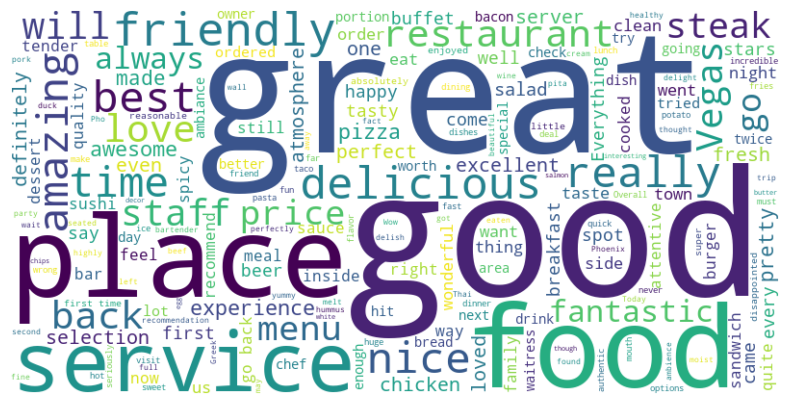

In [20]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = data.loc[data['Liked'] == 1]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


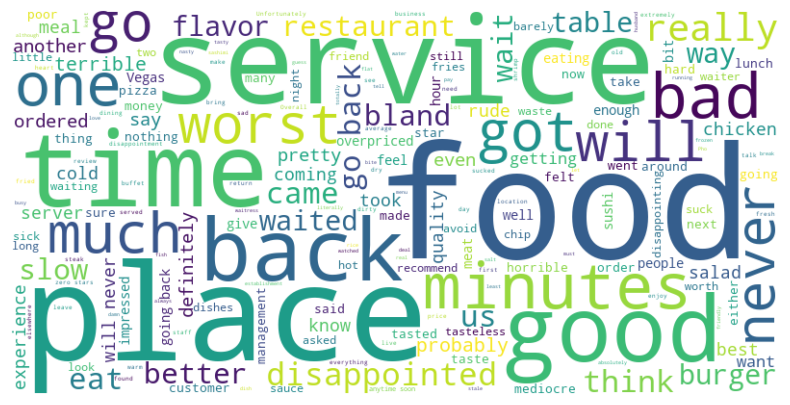

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = data.loc[data['Liked'] == 0,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [22]:
from sklearn.feature_extraction.text import CountVectorizer


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)


In [24]:
X = cv.fit_transform(corpus).toarray()


In [25]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
y = data['Liked']

In [27]:

y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [28]:
print(X.shape)  # Should show (1001, n_features)
print(y.shape)  # Should show (1000,)


(1001, 1500)
(1000,)


In [29]:
import numpy as np

# Check if there are any NaNs in X
print(np.isnan(X).sum())

# Check if there are any NaNs in y
print(np.isnan(y).sum())



0
0


In [30]:
# Find the indices of rows in X that contain NaNs
nan_rows = np.where(np.isnan(X).any(axis=1))[0]
print(nan_rows)


[]


In [31]:
# Remove rows with NaNs in X
X_clean = X[~np.isnan(X).any(axis=1)]

# Ensure y is also trimmed to match the new X
y_clean = y[:len(X_clean)]


In [32]:
print(type(X))
print(type(y))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [33]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1001, 1500)
Shape of y: (1000,)


In [34]:
import numpy as np

# Check if there are any NaNs in X
print("NaNs in X:", np.isnan(X).sum())

# Check if there are any NaNs in y
print("NaNs in y:", np.isnan(y).sum())


NaNs in X: 0
NaNs in y: 0


In [35]:
print("First 5 rows of X:\n", X[:5])
print("First 5 elements of y:\n", y[:5])


First 5 rows of X:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
First 5 elements of y:
 0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64


In [36]:
# Trim X to match y's length, or vice versa
if X.shape[0] > y.shape[0]:
    X = X[:y.shape[0]]
else:
    y = y[:X.shape[0]]

print("Trimmed X shape:", X.shape)
print("Trimmed y shape:", y.shape)


Trimmed X shape: (1000, 1500)
Trimmed y shape: (1000,)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Evaluating the Models based on Accuracy Score

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred)

0.675

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.785

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.73

# GUI

In [44]:
import joblib

In [45]:
joblib.dump(lr,'Restaurant_review_model')


['Restaurant_review_model']

In [46]:
joblib.dump(cv, 'cv.joblib')

['cv.joblib']

In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
# Preprocess text function
def preprocess_text(text):
    ps = PorterStemmer()
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review_words = review.split()
    review_words = [ps.stem(word) for word in review_words if word not in set(stopwords.words('english'))]
    return ' '.join(review_words)

# Load the trained model and vectorizer
try:
    lr = joblib.load('Restaurant_review_model.joblib')
    cv = joblib.load('cv.joblib')
except FileNotFoundError:
    print("Model or vectorizer file not found. Please check the file paths.")
    exit()

# GUI Class
class SentimentAnalysisApp:
    def __init__(self, master):
        self.master = master
        master.title("Sentiment Analysis")

        self.label = tk.Label(master, text="Enter text for sentiment analysis:")
        self.label.pack()

        self.text_entry = tk.Entry(master, width=50)
        self.text_entry.pack()

        self.analyze_button = tk.Button(master, text="Analyze Sentiment", command=self.analyze_sentiment)
        self.analyze_button.pack()

        self.result_label = tk.Label(master, text="")
        self.result_label.pack()

    def analyze_sentiment(self):
        user_input = self.text_entry.get()

        if not user_input.strip():
            messagebox.showerror("Error", "Please enter some text!")
            return

        # Preprocess and vectorize the input text
        preprocessed_input = preprocess_text(user_input)
        vectorized_input = cv.transform([preprocessed_input]).toarray()

        # Predict sentiment using the loaded model
        prediction = lr.predict(vectorized_input)

        # Display the result
        sentiment = "Positive" if prediction == 1 else "Negative"
        self.result_label.config(text=f"Sentiment: {sentiment}")

# Run the GUI application
root = tk.Tk()
app = SentimentAnalysisApp(root)
root.mainloop()


Model or vectorizer file not found. Please check the file paths.
